# Basic EDA Operations

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

## Read Data

In [2]:
df=pd.read_csv("TSLA.csv")
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

## Rename Columns

In [3]:
df=df.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                       'Adj Close':'adj_close','Volume':'volume'})

## Display Data

In [4]:
df.head(5)

,date,open,high,low,close,adj_close,volume
0,2016-08-16,45.098000,45.438000,44.681999,44.722000,44.722000,11335500
1,2016-08-17,44.866001,44.966000,44.560001,44.647999,44.647999,8935500
2,2016-08-18,44.764000,45.132000,44.458000,44.702000,44.702000,8572500
3,2016-08-19,44.708000,45.034000,44.506001,45.000000,45.000000,8297500
4,2016-08-22,44.834000,45.021999,44.535999,44.585999,44.585999,10327500


In [5]:
df.tail(5)

,date,open,high,low,close,adj_close,volume
1253,2021-08-09,710.169983,719.030029,705.130005,713.760010,713.760010,14715300
1254,2021-08-10,713.989990,716.590027,701.880005,709.989990,709.989990,13432300
1255,2021-08-11,712.710022,715.179993,704.210022,707.820007,707.820007,9800600
1256,2021-08-12,706.340027,722.799988,699.400024,722.250000,722.250000,17459100
1257,2021-08-13,723.710022,729.900024,714.340027,717.169983,717.169983,16698900


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1258 non-null   object 
 1   open       1258 non-null   float64
 2   high       1258 non-null   float64
 3   low        1258 non-null   float64
 4   close      1258 non-null   float64
 5   adj_close  1258 non-null   float64
 6   volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [7]:
df.describe()

,open,high,low,close,adj_close,volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,183.274022,187.265251,178.941224,183.351102,183.351102,4.441050e+07
std,227.979867,232.845126,222.443374,227.987027,227.987027,3.035737e+07
min,36.220001,36.945999,35.397999,35.793999,35.793999,8.297500e+06
25%,54.985001,55.930001,53.929001,54.994501,54.994501,2.478255e+07
50%,66.602002,67.950001,65.445999,66.756000,66.756000,3.498150e+07
75%,165.516998,168.243504,161.504005,163.856503,163.856503,5.211238e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,3.046940e+08


In [8]:
print("total no of rows: ",df.shape[0])
print("total no of columns: ",df.shape[1])

total no of rows:  1258
total no of columns:  7


## Drop Duplicate Values

In [9]:
df=df.drop_duplicates()

In [10]:
df.isnull().sum()

date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

## Convert The Date Column To DateTime Format

In [11]:
df['date'] = pd.to_datetime(df.date)
df.head()

,date,open,high,low,close,adj_close,volume
0,2016-08-16,45.098000,45.438000,44.681999,44.722000,44.722000,11335500
1,2016-08-17,44.866001,44.966000,44.560001,44.647999,44.647999,8935500
2,2016-08-18,44.764000,45.132000,44.458000,44.702000,44.702000,8572500
3,2016-08-19,44.708000,45.034000,44.506001,45.000000,45.000000,8297500
4,2016-08-22,44.834000,45.021999,44.535999,44.585999,44.585999,10327500


## Visualize the Data

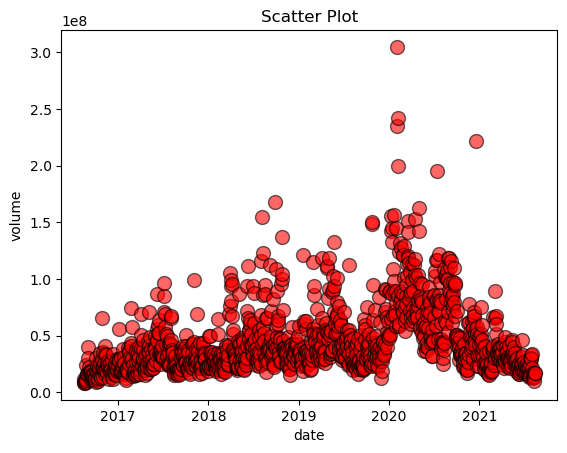

In [12]:
plt.scatter(df['date'], df['volume'], color='red', s=100, edgecolor='black', alpha=0.6)
plt.title("Scatter Plot")
plt.xlabel('date')
plt.ylabel('volume')
plt.show()

In [13]:
monthvise= df.groupby(df['date'].dt.strftime('%B'))[['open','high','low','close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,open,high,low,close
date,,,,
January,211.862118,216.422843,207.981666,212.589568
February,227.558569,232.555875,221.189790,227.040441
March,194.185782,199.200763,186.967436,193.161236
April,205.595030,210.014173,201.183262,205.671611
May,181.159451,184.650641,177.194171,180.826095
June,204.369197,208.224298,201.003944,204.726543
July,226.404302,231.242849,220.747170,226.023074
August,173.212144,177.112380,170.228433,174.174936
September,129.064456,132.665148,124.469089,128.870416


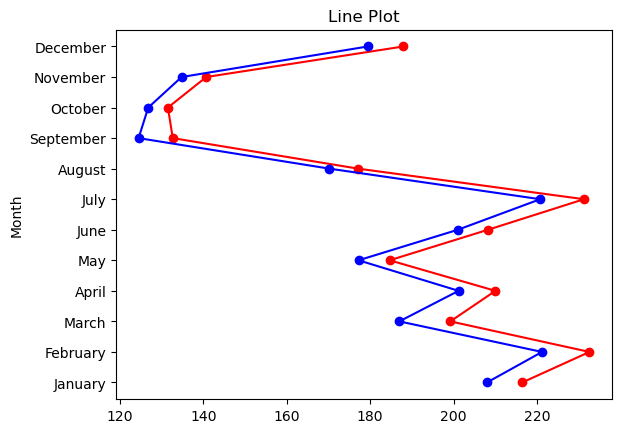

In [14]:
plt.plot(monthvise['high'],monthvise.index, color='red', marker='o')
plt.plot(monthvise['low'],monthvise.index,color='blue', marker='o')
plt.ylabel('Month')
plt.title('Line Plot')
plt.show()

## Checking Outliers

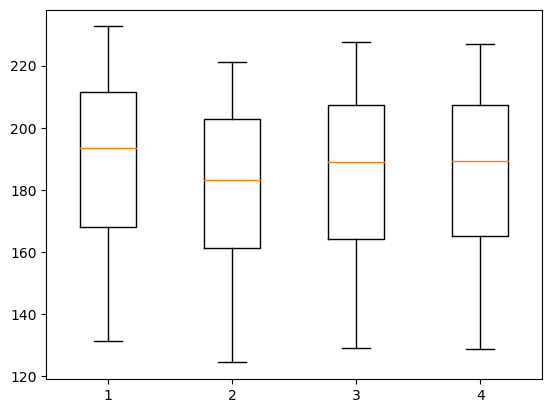

In [15]:
plt.boxplot([monthvise['high'], monthvise['low'], monthvise['open'], monthvise['close']])
plt.show()